In [1]:
!pip install openpyxl
!pip install imbalanced-learn
!pip3 install ipympl
!pip install shapely

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os, sys
from numpy import nan
import re
import ipympl
# from IPython.core.display import display, HTML
import json
from os import listdir
import glob
import math
from IPython.display import Image, display, HTML
from shapely.geometry import mapping
from sklearn.cross_decomposition import PLSRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, train_test_split, RepeatedKFold, cross_val_predict
from sklearn.metrics import r2_score, mean_squared_error, precision_score, recall_score, mean_absolute_error, make_scorer
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, LeaveOneOut, cross_validate
from sklearn.impute import SimpleImputer
from tqdm.notebook import tqdm
from sklearn.svm import SVC
from tqdm import tqdm
import pickle
from imblearn.over_sampling import SMOTE
from scipy.stats import ks_2samp
from scipy import stats
np.seterr(divide='ignore', invalid='ignore')
pd.options.display.max_columns = 100
%matplotlib inline

# Step 1: Data Acquisition

In [69]:
maize_data = pd.read_csv('maize_2018_2019_unl_spectra.csv')

mdf = maize_data

mdf.head(5)

,ID,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,...,2451,2452,2453,2454,2455,2456,2457,2458,2459,2460,2461,2462,2463,2464,2465,2466,2467,2468,2469,2470,2471,2472,2473,2474,2475,2476,2477,2478,2479,2480,2481,2482,2483,2484,2485,2486,2487,2488,2489,2490,2491,2492,2493,2494,2495,2496,2497,2498,2499,2500
0,1,0.106430,0.098860,0.088910,0.077947,0.072843,0.093862,0.090015,0.070006,0.090431,0.084056,0.073512,0.073086,0.067475,0.068706,0.068850,0.063061,0.064384,0.066461,0.070936,0.078129,0.069275,0.064903,0.067154,0.065122,0.060868,0.058503,0.059176,0.060199,0.059542,0.056787,0.053711,0.056561,0.059718,0.059836,0.056556,0.059190,0.057359,0.052478,0.053686,0.054506,0.055347,0.055851,0.053617,0.055252,0.058038,0.058547,0.057006,0.056262,0.055866,...,0.056319,0.055844,0.055375,0.055058,0.054726,0.054421,0.054162,0.053836,0.053488,0.053203,0.052905,0.052548,0.052264,0.051997,0.051595,0.051157,0.050832,0.050384,0.049892,0.049764,0.049538,0.049473,0.049243,0.048725,0.048397,0.048044,0.047772,0.047821,0.047637,0.047205,0.046992,0.046813,0.046602,0.046607,0.046481,0.046230,0.045912,0.045301,0.045138,0.045353,0.045184,0.045096,0.045050,0.044625,0.044355,0.044527,0.044399,0.043810,0.043605,0.043599
1,2,0.097093,0.103140,0.083749,0.066028,0.072148,0.087739,0.098567,0.092104,0.062686,0.095519,0.107648,0.072792,0.071982,0.077794,0.071373,0.050405,0.051561,0.051083,0.053461,0.064439,0.047219,0.043872,0.056082,0.057424,0.058312,0.060843,0.060995,0.048972,0.051361,0.049914,0.036760,0.052602,0.054866,0.049009,0.052006,0.052774,0.050657,0.049641,0.054484,0.047719,0.044079,0.048591,0.048487,0.048350,0.048275,0.047974,0.048457,0.048776,0.048339,...,0.047114,0.046864,0.046694,0.046366,0.045964,0.045663,0.045325,0.045112,0.044898,0.044548,0.044306,0.044098,0.043800,0.043470,0.043094,0.042753,0.042579,0.042447,0.042235,0.042065,0.041800,0.041422,0.041198,0.041026,0.040759,0.040543,0.040383,0.040137,0.039915,0.039878,0.039731,0.039409,0.039179,0.038988,0.038808,0.038687,0.038522,0.038289,0.038160,0.038160,0.038003,0.037762,0.037672,0.037440,0.037419,0.037894,0.037886,0.037521,0.037509,0.037503
2,3,0.125163,0.124518,0.127662,0.127982,0.127173,0.115487,0.111536,0.112970,0.100015,0.079823,0.082658,0.102968,0.088516,0.094781,0.094515,0.070130,0.074827,0.079704,0.075530,0.064953,0.070498,0.072435,0.068536,0.068483,0.070248,0.065726,0.058498,0.066385,0.070785,0.069656,0.066325,0.068654,0.066584,0.063986,0.066945,0.068194,0.069426,0.069469,0.065436,0.058559,0.057705,0.061731,0.055525,0.059083,0.065252,0.065030,0.058985,0.062260,0.068849,...,0.055637,0.055295,0.055052,0.054888,0.054461,0.054179,0.054169,0.053794,0.053397,0.053165,0.052658,0.052337,0.052304,0.051942,0.051510,0.051305,0.051045,0.050822,0.050715,0.050409,0.050127,0.049959,0.049740,0.049392,0.049137,0.048937,0.048751,0.048657,0.048485,0.048162,0.048046,0.048203,0.048045,0.047810,0.047612,0.047058,0.046735,0.046689,0.046588,0.046480,0.046410,0.046467,0.046406,0.046281,0.046181,0.046085,0.045880,0.045441,0.045417,0.045704
3,4,0.101250,0.094361,0.086309,0.090478,0.107267,0.088325,0.076786,0.083318,0.080874,0.084091,0.084152,0.079871,0.085310,0.087679,0.079508,0.062870,0.059119,0.068288,0.075749,0.069223,0.066564,0.066067,0.066501,0.067355,0.066727,0.062973,0.059307,0.064315,0.064843,0.063219,0.062928,0.062292,0.062633,0.062704,0.061520,0.063693,0.063807,0.061729,0.061046,0.060998,0.061302,0.061599,0.061438,0.063316,0.064415,0.062895,0.062514,0.061758,0.062089,...,0.063220,0.062894,0.062567,0.062176,0.061807,0.061366,0.060850,0.060529,0.060285,0.059850,0.059491,0.059236,0.058814,0.058425,0.058187,0.057785,0.057324,0.057021,0.056671,0.056601,0.056302,0.055740,0.055415,0.055086,0.054752,0.054657,0.054514,0.054307,0.054005,0.053654,0.053363,0.052884,0.052615,0.052670,0.052539,0.052351,0.052190,0.051985,0.051738,0.051436,0.051306,0.051264,0.051125,0.051135,0.05

In [9]:
mdr = pd.read_csv('maize_2018_2019_unl_traits.csv')

mdr.head(2)

,ID,Nitrogen,Phosphorus,Potassium,Chlorophyll,Leaf_Dry_Weight,Leaf_Fresh_Weight,Leaf_Area
0,1,2.96,0.22,1.78,476.60,8.46,30.70,1420.57
1,2,3.11,0.48,2.74,492.17,6.69,27.55,1144.10


In [10]:
mdrN = mdr[["Nitrogen"]]
mdrP = mdr[["Phosphorus"]]
mdrK = mdr[["Potassium"]]

In [76]:
mdr.head(2)

,ID,Nitrogen,Phosphorus,Potassium,Chlorophyll,Leaf_Dry_Weight,Leaf_Fresh_Weight,Leaf_Area
0,1,2.96,0.22,1.78,476.60,8.46,30.70,1420.57
1,2,3.11,0.48,2.74,492.17,6.69,27.55,1144.10


# Step 2: Data Preprocessing 

In [77]:
mdf.isnull().sum()
mdr.isnull().sum()

ID                   0
Nitrogen             0
Phosphorus           0
Potassium            0
Chlorophyll          0
Leaf_Dry_Weight      0
Leaf_Fresh_Weight    0
Leaf_Area            0
dtype: int64

In [182]:
X = mdf

# getting yN, yP, and yK in series form for the input of train-test split ahead   
yN = mdrN
yN = yN.iloc[: , 0]

yP = mdrP
yP = yP.iloc[: , 0]

yK = mdrK
yK = yK.iloc[: , 0]


# Step 3:  Train-Test Split  and its Goodness

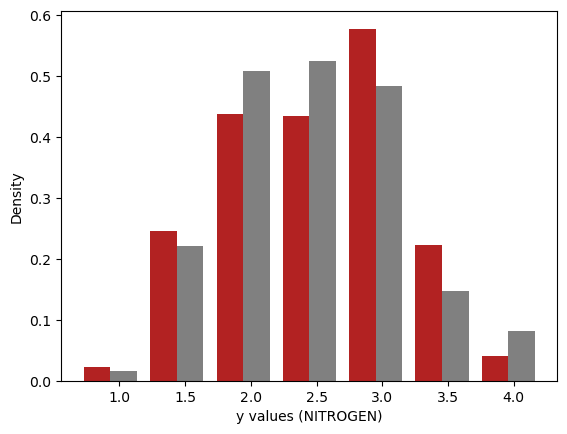

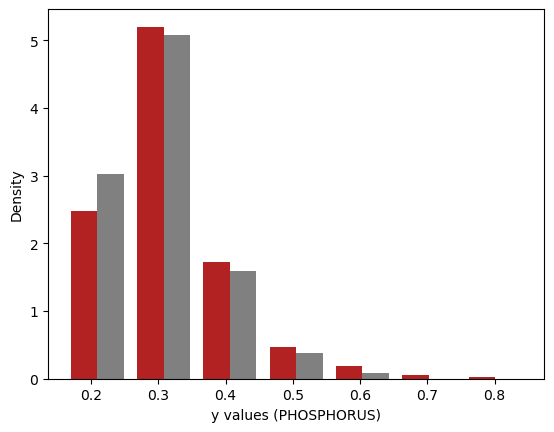

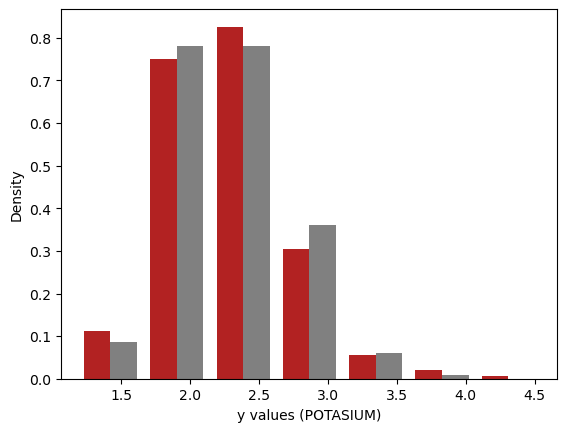

In [231]:
rand_st = 14
tst_siz = 0.2

# Train test split for Nitrogen
XN_train, XN_test,yN_train, yN_test = train_test_split(X, yN, test_size = tst_siz, random_state = rand_st)
# ks2_test = ks_2samp(yN_train, yN_test)      ---> uncomment to identify source of error?

# Train test split for Phosphorous
XP_train, XP_test, yP_train, yP_test = train_test_split(X, yP, test_size = tst_siz, random_state = rand_st)

# Train test split for Potasium
XK_train, XK_test, yK_train, yK_test = train_test_split(X, yK, test_size = tst_siz, random_state = rand_st)



## Plotting the Distribution of Train and Test Output Data  -----------for  Nitrogen ----
plt.style.use('seaborn-deep')
min_y = np.min(yN)
max_y = np.max(yN)

#fig, ax = plt.subplots(1,2, figsize=(10,4))
bins = np.linspace(min_y, max_y, 8)

plt.hist([yN_train, yN_test], bins , label=['Train', 'Test'], density=True, color = ['firebrick','gray'])
# results in error when yN_train/ yN_test is data frame or ndarray
#ax[0].legend(loc='upper right')
plt.xlabel('y values (NITROGEN)')
plt.ylabel('Density')
plt.show()



## Plotting the Goodness of Train-Test Split  -----------for  Phosphorus ----
plt.style.use('seaborn-deep')
min_y = np.min(yP)
max_y = np.max(yP)

#fig, ax = plt.subplots(1,2, figsize=(10,4))
bins = np.linspace(min_y, max_y, 8)

plt.hist([yP_train, yP_test], bins , label=['Train', 'Test'], density=True, color = ['firebrick','gray'])
# results in error when yN_train/ yN_test is data frame or ndarray
#ax[0].legend(loc='upper right')
plt.xlabel('y values (PHOSPHORUS)')
plt.ylabel('Density')
plt.show()




## Plotting the Goodness of Train-Test Split   -----------for  Potasium ----
plt.style.use('seaborn-deep')
min_y = np.min(yK)
max_y = np.max(yK)

#fig, ax = plt.subplots(1,2, figsize=(10,4))
bins = np.linspace(min_y, max_y, 8)

plt.hist([yK_train, yK_test], bins , label=['Train', 'Test'], density=True, color = ['firebrick','gray'])
# results in error when yN_train/ yN_test is data frame or ndarray
#ax[0].legend(loc='upper right')
plt.xlabel('y values (POTASIUM)')
plt.ylabel('Density')
plt.show()

# Step 4: Training the Model

        - Create a regr object
        - Apply fit function (using regr object) on training data
        - Check the weights/parameters generated by fit function 

In [232]:
from sklearn import linear_model

regrN = linear_model.LinearRegression()

regrP = linear_model.LinearRegression()

regrK = linear_model.LinearRegression()

# train the model using X_train and y_train (identified in previous step)

regrN.fit(XN_train, yN_train)
regrP.fit(XP_train, yP_train)
regrK.fit(XK_train, yK_train)

print ('Nitrogen Model')
print ('Coefficients: ', regrN.coef_)
print ('Intercept: ', regrN.intercept_)

print ('\n Phosphorus Model')
print ('Coefficients: ', regrP.coef_)
print ('Intercept: ', regrP.intercept_)

print ('\n Potasium model')
print ('Coefficients: ', regrK.coef_)
print ('Intercept: ', regrK.intercept_)

Nitrogen Model
Coefficients:  [ 8.51632898e-05  6.09979417e-02 -3.88177976e+00 ...  2.73858600e+02
 -2.83740678e+02 -2.24299304e+00]
Intercept:  4.039101287862021

 Phosphorus Model
Coefficients:  [-1.95727880e-05 -4.75499989e+00  1.00269969e+01 ...  6.88313652e+01
 -9.43927142e+01  8.45508162e+00]
Intercept:  0.6312288334580888

 Potasium model
Coefficients:  [-4.85626454e-05 -1.13762153e+01  2.20543200e+01 ... -3.26405033e+02
  3.50213848e+02 -1.79811112e+02]
Intercept:  4.946852070525116


# Step 5: Prediction on Test Data 

In [233]:
yN_pred = regrN.predict(XN_test)
yN_pred = np.round(yN_pred, 2)

yP_pred = regrP.predict(XP_test)
yP_pred = np.round(yP_pred, 2)

yK_pred = regrN.predict(XK_test)
yK_pred = np.round(yK_pred, 2)


# Step 6: Model Accuracy and Plots

Nitogen Model Accuracy
Mean Percentage Error: 19.009315235924536
Coefficient of determination- r2: 0.24615347224011175


Text(0, 0.5, 'Predicted (Nitrogen) content - YELLOW points')

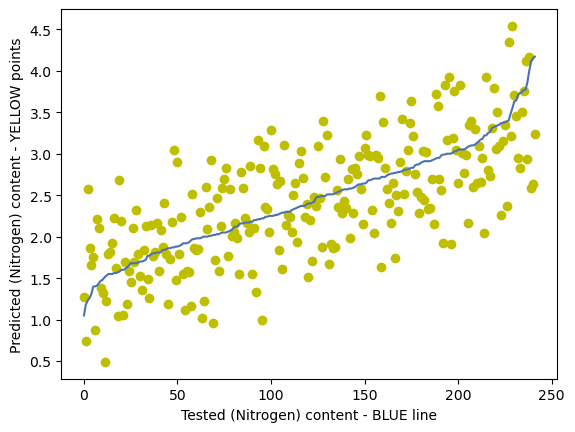

In [234]:
errorsN = np.mean(abs((yN_pred - yN_test)/yN_test))
r2N = r2_score(yN_test, yN_pred)
print('Nitogen Model Accuracy')
print('Mean Percentage Error:', errorsN*100)
print('Coefficient of determination- r2:', r2N)

# predicted points corresponding to the points on increasing y_test plot 
yN_tst = yN_test.to_numpy()
#y_pred
arg = yN_tst.argsort()
testYN = yN_tst[arg]
predYN = yN_pred[arg]
x = np.arange(0, len(testYN))
plt.plot(x, testYN)
plt.scatter(x, predYN, c='y')
plt.xlabel('Tested (Nitrogen) content - BLUE line')
plt.ylabel('Predicted (Nitrogen) content - YELLOW points')


 Phosphorus Model Accuracy
Mean Percentage Error: 40.78481593337352
Coefficient of determination- r2: -2.9189241711687206


Text(0, 0.5, 'Predicted (Phosphorus) content - YELLOW points')

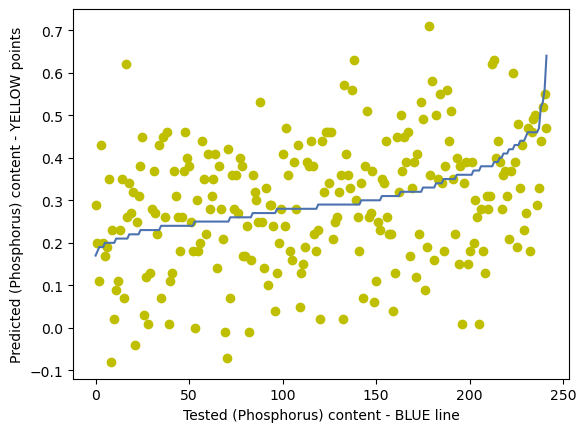

In [235]:
errorsP = np.mean(abs((yP_pred - yP_test)/yP_test))
r2P = r2_score(yP_test, yP_pred)
print('\n Phosphorus Model Accuracy')
print('Mean Percentage Error:', errorsP*100)
print('Coefficient of determination- r2:', r2P)

# predicted points corresponding to the points on increasing y_test
yP_tst = yP_test.to_numpy()
#y_pred
arg = yP_tst.argsort()
testYP = yP_tst[arg]
predYP = yP_pred[arg]
x = np.arange(0, len(testYP))
plt.plot(x, testYP)
plt.scatter(x, predYP, c='y')
plt.xlabel('Tested (Phosphorus) content - BLUE line')
plt.ylabel('Predicted (Phosphorus) content - YELLOW points')


 Potasium Model Accuracy
Mean Percentage Error: 29.41792860592339
Coefficient of determination- r2: -2.968505819652549


Text(0, 0.5, 'Predicted (Potasium) content - YELLOW points')

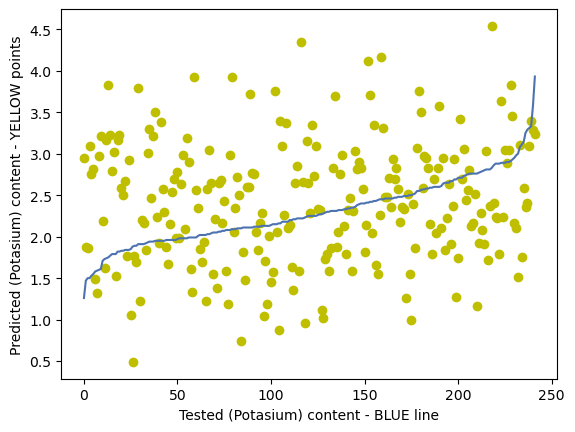

In [236]:
errorsK = np.mean(abs((yK_pred - yK_test)/yK_test))
r2K = r2_score(yK_test, yK_pred)
print('\n Potasium Model Accuracy')
print('Mean Percentage Error:', errorsK*100)
print('Coefficient of determination- r2:', r2K)

# predicted points corresponding to the points on increasing y_test
yK_tst = yK_test.to_numpy()
#y_pred
arg = yK_tst.argsort()
testYK = yK_tst[arg]
predYK = yK_pred[arg]
x = np.arange(0, len(testYK))
plt.plot(x, testYK)
plt.scatter(x, predYK, c='y')
plt.xlabel('Tested (Potasium) content - BLUE line')
plt.ylabel('Predicted (Potasium) content - YELLOW points')